## Algoritmo de Grover para a solução de problemas de grafos

Seja um grafo $G(V,A)$ com $n$ vértices e $m$ arestas, onde cada vértice pode assumir dois estados possíveis. Uma operação de inversão de estado em um dos vértices, resulta, também, na inversão dos estados dos vértices adjacentes. O problema consiste em determinar quais operações devem ser feitas para que, dado um estado inicial $G_i$, o grafo assuma o estado desejado $G_f$.

In [21]:
import qiskit
from qiskit import *

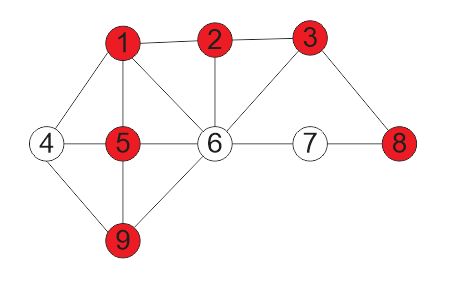

In [22]:
# estado inicial de G (G_i)
graph_input = [1, 1, 1, 0, 1, 0, 0, 1, 1]

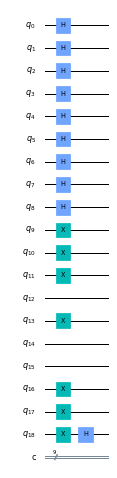

In [23]:
reg1 = 9 #armazena todas as soluções possíveis
reg2 = 9 #entrada
aux = 1 #qubit auxiliar
n = reg1 + reg2 + aux

qc=QuantumCircuit(n,reg1) #circuito quantico com n qubits e reg1=9 registradores clássicos


'''
Criar uma superposição de todas as 2^n possíveis soluções:
'''
qc.h(range(reg1))

'''
Armazenar o estado inicial de G em reg2:
'''
for i in range(len(graph_input)):
    if(graph_input[i]==1):
        qc.x(i+reg1)

'''
Qubit auxiliar
'''
qc.x(n-1)
qc.h(n-1)

qc.draw('mpl', scale=0.5)

In [24]:

a=9 #1
b=10 #2
c=11 #3
d=12 #4
e=13 #5
f=14 #6
g=15 #7
h=16 #8
i=17 #9

qc.barrier()

# Cria o grafo em forma de circuito quântico
def graph():

    qc.cx(0,a)
    qc.cx(0,b)
    qc.cx(0,d)
    qc.cx(0,e)
    qc.cx(0,f)

    qc.cx(1,a)
    qc.cx(1,b)
    qc.cx(1,c)
    qc.cx(1,f)

    qc.cx(2,c)
    qc.cx(2,b)
    qc.cx(2,f)
    qc.cx(2,h)

    qc.cx(3,d)
    qc.cx(3,a)
    qc.cx(3,e)
    qc.cx(3,i)

    qc.cx(4,a)
    qc.cx(4,d)
    qc.cx(4,e)
    qc.cx(4,f)
    qc.cx(4,i)

    qc.cx(5,a)
    qc.cx(5,b)
    qc.cx(5,c)
    qc.cx(5,e)
    qc.cx(5,f)
    qc.cx(5,g)
    qc.cx(5,i)


    qc.cx(6,f)
    qc.cx(6,g)
    qc.cx(6,h)

    qc.cx(7,c)
    qc.cx(7,g)
    qc.cx(7,h)
       
    qc.cx(8,d)
    qc.cx(8,e)
    qc.cx(8,f)
    qc.cx(8,i)
    
    return qc


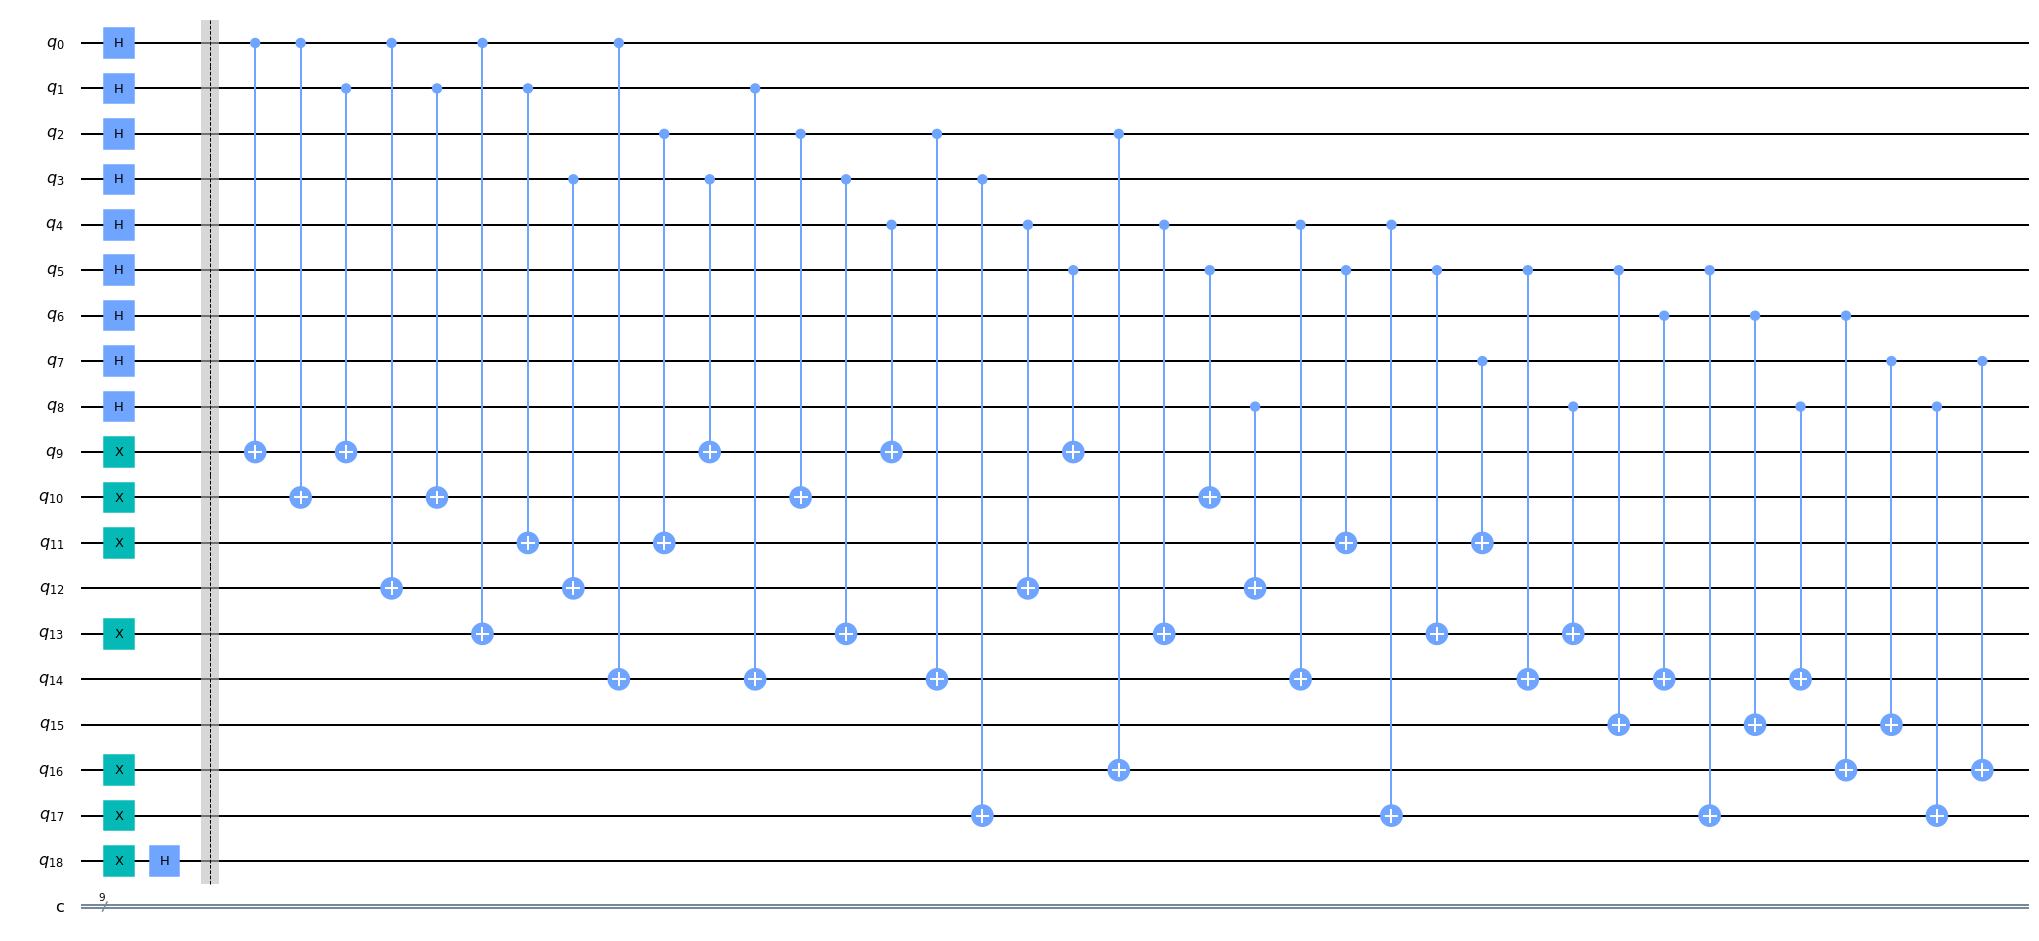

In [25]:
qc.compose(graph())
qc.draw('mpl',fold=-1)

Como exemplo, definiremos $G_f$ como o seguinte Grafo:
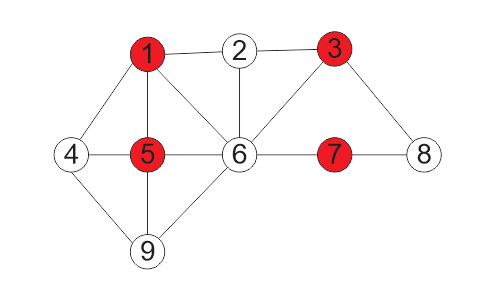

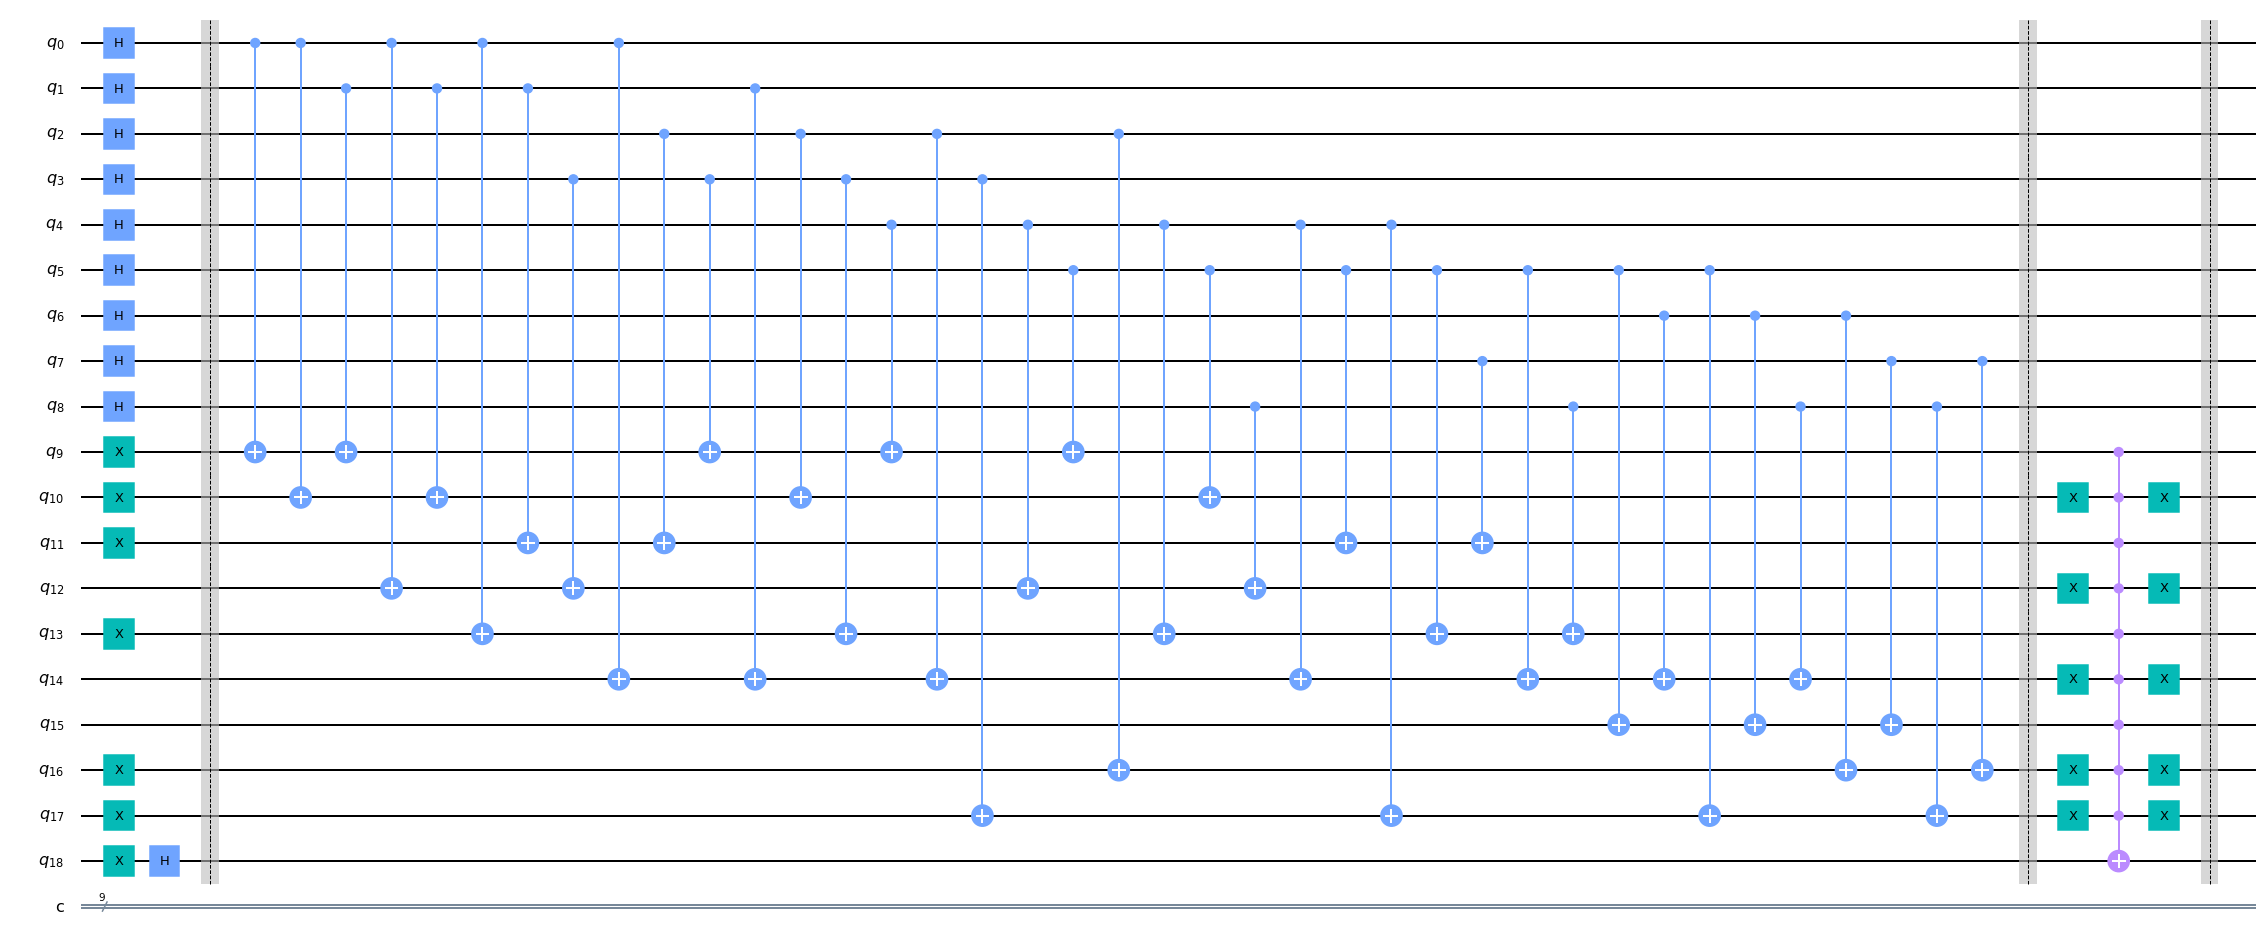

In [26]:
# Inversor de fase
# Define a solução desejada
qc.barrier()
qc.x([b,d,f,h,i])
qc.mct([9,10,11,12,13,14,15,16,17],n-1)
qc.x([b,d,f,h,i])
qc.barrier()

qc.draw('mpl',fold=-1)

In [27]:
qc.compose(graph())

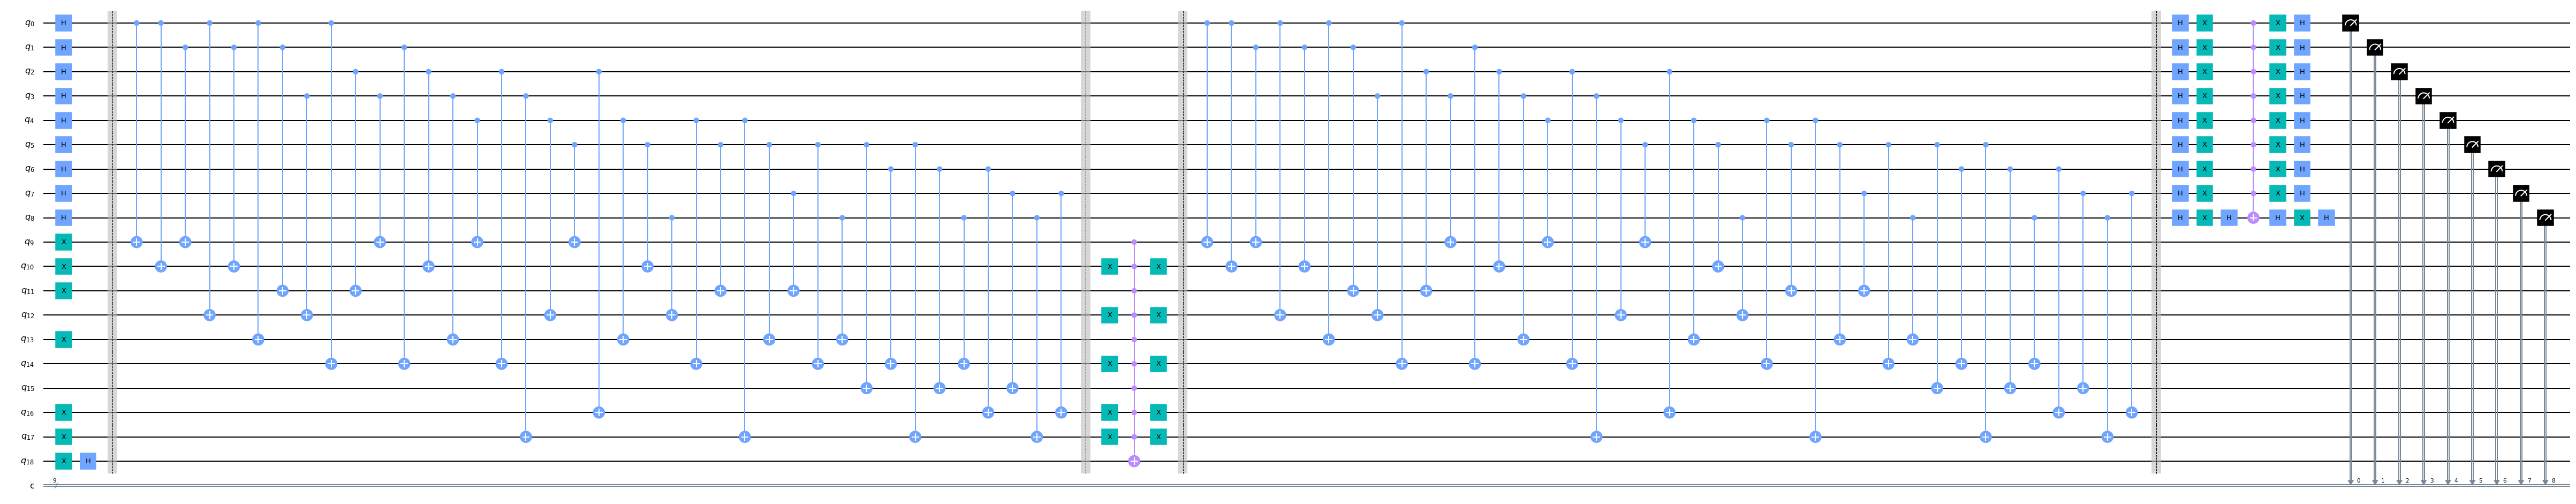

In [28]:
#Difusor
#Inversão sobre a média
qc.barrier()

qc.h(range(reg1))
qc.x(range(reg1))
qc.h(reg1-1)
qc.mct([0,1,2,3,4,5,6,7],reg1-1)
qc.h(reg1-1)
qc.x(range(reg1))
qc.h(range(reg1))



qc.measure(range(reg1),range(reg1))

qc.draw('mpl',fold=-1)


In [32]:
simulator = Aer.get_backend('qasm_simulator')
from qiskit.visualization import *


In [33]:
counts = execute(qc, backend=simulator, shots=1024).result().get_counts(qc)

In [36]:
#Solução
max(counts, key=counts.get)

'001001001'

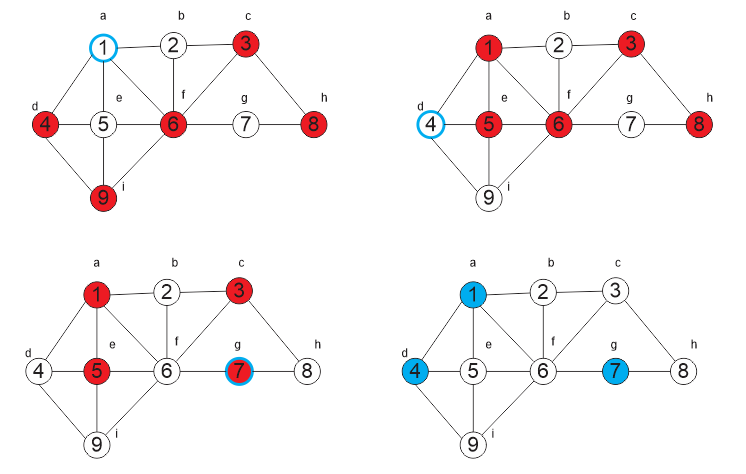